# Is podium


## Dependencies


The dependencies used are as follows


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer

import sys

sys.path.append("..")

from utils.visualization import model_pgrmlly_outlier_treatment
from utils.custom_scorers import balanced_accuracy_score

import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings

warnings.simplefilter("ignore")

## Initialization


We continue with the validation of the model that predicts the podium


In [2]:
df = pd.read_csv("../assets/data/processed/base_model.csv")

podiums = df[df["positionFinal"].isin([1, 2, 3])][
    ["raceYear", "raceRound", "driverRef"]
]
podiums = podiums.groupby(by=["raceYear", "raceRound"]).agg({"driverRef": ",".join})

X = pd.read_csv("../assets/data/processed/base_model_X.csv")
y = df.merge(podiums, how="left", on=["raceYear", "raceRound"], suffixes=("", "Podium"))
y = y.apply(lambda x: int(x["driverRef"] in x["driverRefPodium"]), axis=1)

## K-Nearest Neighbors


Performance without treatment: 0.7776148091349805
Best performance with treatment:
     threshold = 10.400000000000006
     performance = 0.7776148091349805


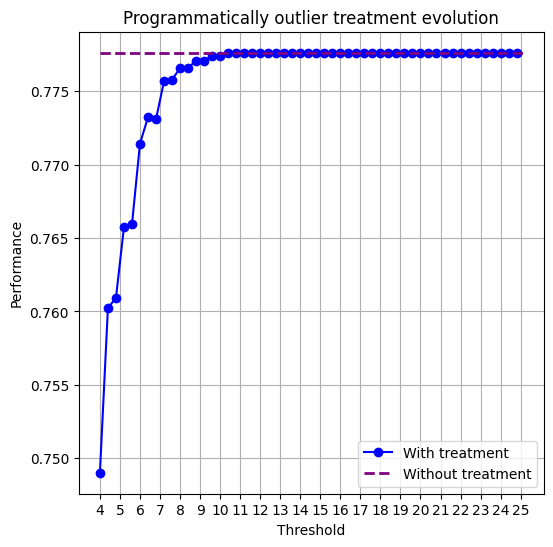

In [3]:
X_selected = X[
    [
        "carNumber",
        "positionGrid",
        "driverRef",
        "driverNationality",
        "constructorRef",
        "raceYear",
        "driverWins",
        "constructorWins",
    ]
]
knn = KNeighborsClassifier(n_neighbors=24, metric="cosine", weights="distance")
model_pgrmlly_outlier_treatment(
    knn,
    df,
    X_selected,
    y,
    make_scorer(balanced_accuracy_score),
    (4, 25.1, 0.4),
)

Performance without treatment: 0.704491837760571
Best performance with treatment:
     threshold = 10.400000000000006
     performance = 0.704491837760571


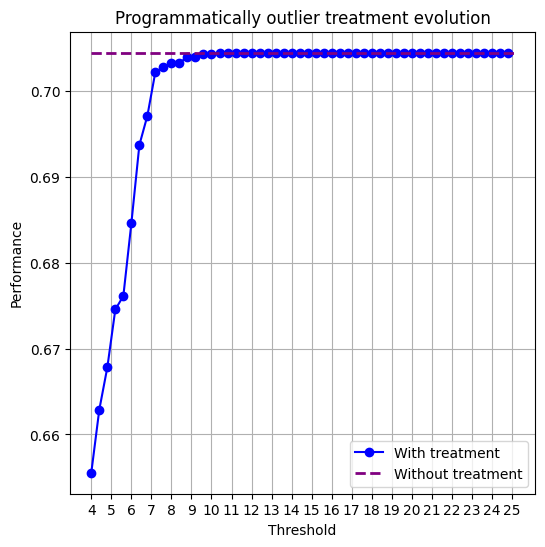

In [4]:
knn = KNeighborsClassifier(n_neighbors=24, metric="cosine", weights="distance")
model_pgrmlly_outlier_treatment(
    knn,
    df,
    X,
    y,
    make_scorer(balanced_accuracy_score),
    (4, 25.1, 0.4),
)

## Decision Tree


Performance without treatment: 0.7985199066852137
Best performance with treatment:
     threshold = 13.200000000000008
     performance = 0.8001136685268203


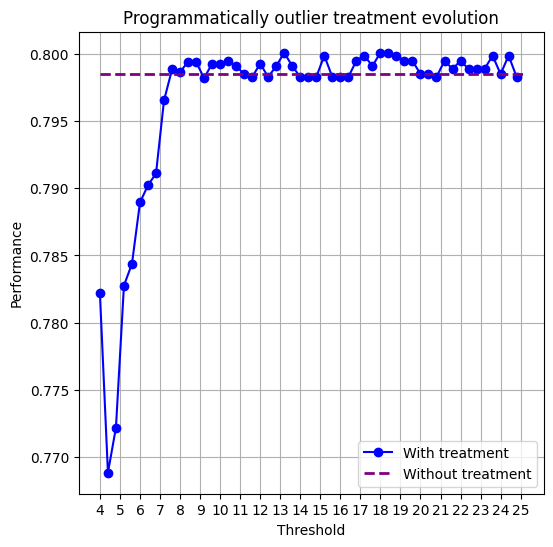

In [5]:
X_selected = X[
    [
        "positionGrid",
        "driverNationality",
        "constructorRef",
        "constructorNationality",
        "raceYear",
        "raceRound",
        "grandPrix",
        "circuitRef",
        "circuitLocation",
        "circuitCountry",
        "circuitLng",
        "driverWins",
        "constructorWins",
        "q3",
    ]
]
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_pgrmlly_outlier_treatment(
    tree,
    df,
    X_selected,
    y,
    make_scorer(balanced_accuracy_score),
    (4, 25.1, 0.4),
)

Performance without treatment: 0.7918814870123148
Best performance with treatment:
     threshold = 13.600000000000009
     performance = 0.7928622567081683


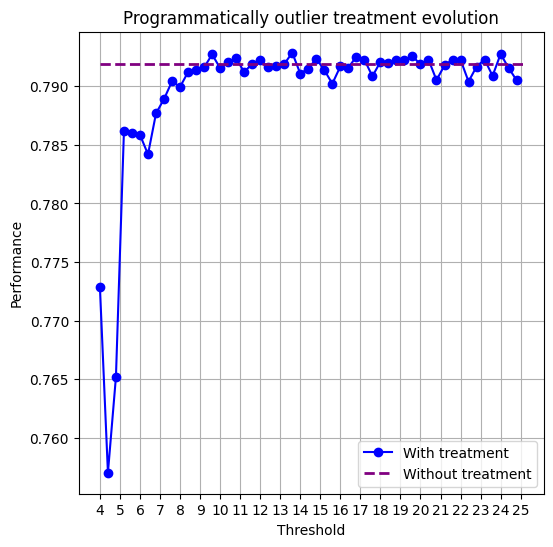

In [6]:
tree = DecisionTreeClassifier(max_depth=4, criterion="log_loss", splitter="best")
model_pgrmlly_outlier_treatment(
    tree,
    df,
    X,
    y,
    make_scorer(balanced_accuracy_score),
    (4, 25.1, 0.4),
)

## Random Forest


Performance without treatment: 0.7888096504767863
Best performance with treatment:
     threshold = 13.200000000000008
     performance = 0.7902752265057095


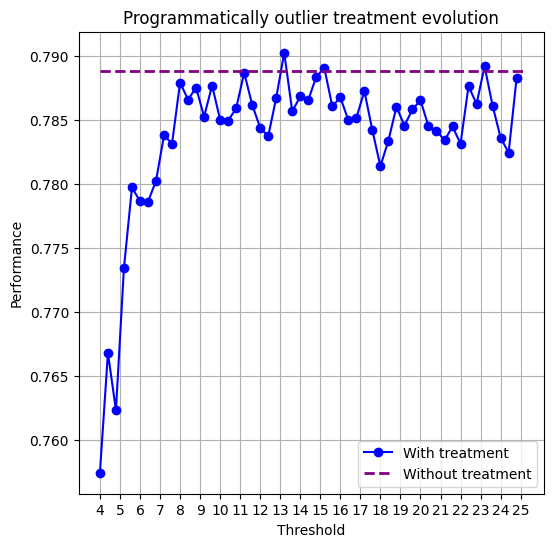

In [7]:
X_selected = X[
    [
        "positionGrid",
        "driverNumber",
        "driverNationality",
        "constructorRef",
        "raceYear",
        "driverWins",
        "constructorWins",
        "q1",
        "driverAgeAtRace",
    ]
]
random_forest = RandomForestClassifier(
    max_depth=9, n_estimators=387, criterion="log_loss"
)
model_pgrmlly_outlier_treatment(
    random_forest,
    df,
    X_selected,
    y,
    make_scorer(balanced_accuracy_score),
    (4, 25.1, 0.4),
)

Performance without treatment: 0.7567440654207965
Best performance with treatment:
     threshold = 11.200000000000006
     performance = 0.7599809567768324


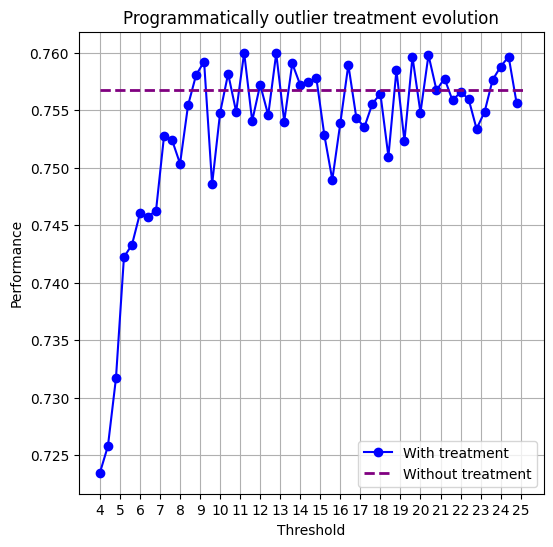

In [8]:
random_forest = RandomForestClassifier(
    max_depth=9, n_estimators=387, criterion="log_loss"
)
model_pgrmlly_outlier_treatment(
    random_forest,
    df,
    X,
    y,
    make_scorer(balanced_accuracy_score),
    (4, 25.1, 0.4),
)

## Multilayer Perceptron


Performance without treatment: 0.8003636084231586
Best performance with treatment:
     threshold = 17.20000000000001
     performance = 0.8049056455362321


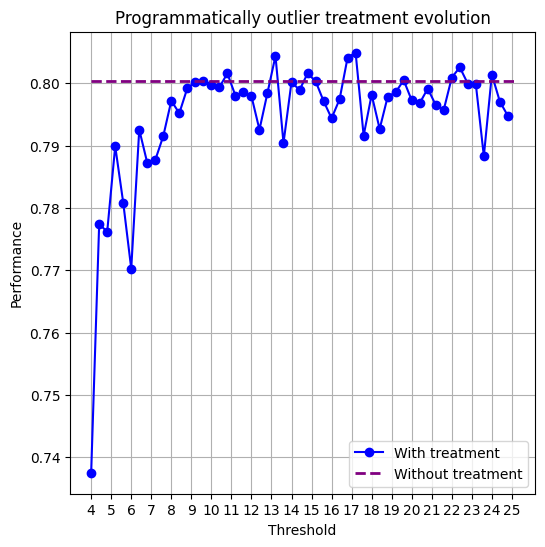

In [9]:
X_selected = X[
    [
        "positionGrid",
        "raceYear",
        "grandPrix",
        "circuitLocation",
        "circuitCountry",
        "circuitLat",
        "circuitAlt",
        "driverWins",
        "constructorWins",
        "q1",
        "q2",
    ]
]
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(71, 19, 76, 43, 40))
model_pgrmlly_outlier_treatment(
    nn,
    df,
    X_selected,
    y,
    make_scorer(balanced_accuracy_score),
    (4, 25.1, 0.4),
)

Performance without treatment: 0.7938199154690667
Best performance with treatment:
     threshold = 16.80000000000001
     performance = 0.8028026709850343


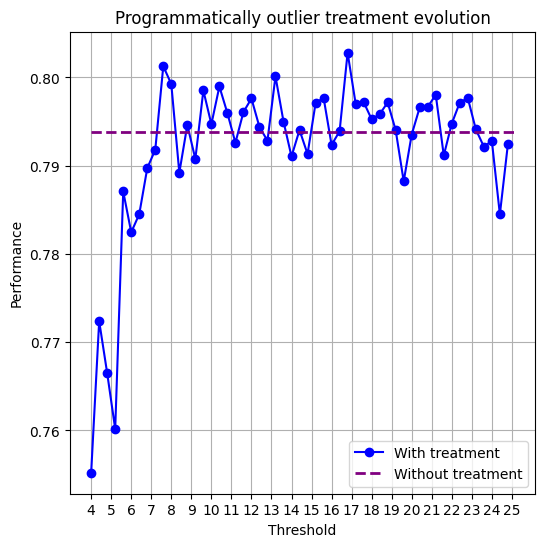

In [10]:
nn = MLPClassifier(activation="logistic", hidden_layer_sizes=(71, 19, 76, 43, 40))
model_pgrmlly_outlier_treatment(
    nn,
    df,
    X,
    y,
    make_scorer(balanced_accuracy_score),
    (4, 25.1, 0.4),
)

## Results


Considering the randomness of the models, the results have not improved.
